interactive(children=(FloatSlider(value=0.005, description='Init. Infected Pop.', layout=Layout(width='99%'), …

<function __main__.main(init_infect, b, k, days)>

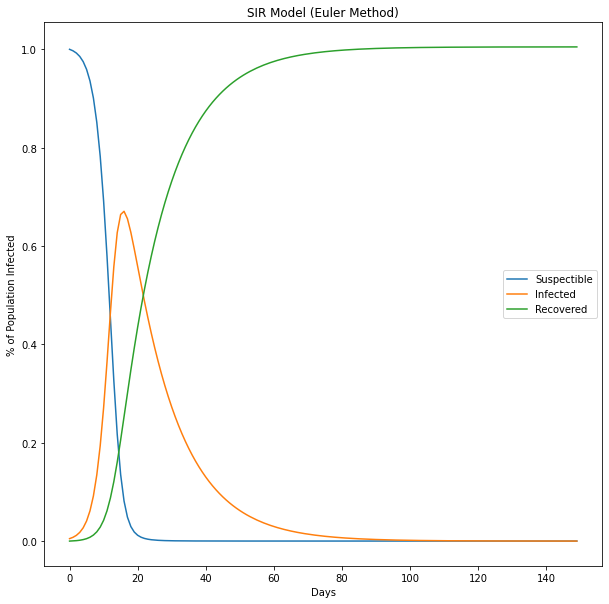

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import pyplot
import numpy as np


from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

def main(init_infect,b,k,days):
    S = np.zeros([days,1])
    S[0] = 1
    I = np.zeros([days,1])
    I[0] = init_infect
    R = np.zeros([days,1])
    days_arr = np.arange(0,days,1)
    
    dt = 1
    N = int(days/dt)
    for i in range(N-1):
        S[i+1] = S[i] - (b*S[i]*I[i]*dt)
        I[i+1] = I[i] + (b*S[i]*I[i]-((1/k)*I[i]))*dt
        R[i+1] = R[i] + ((1/k)*I[i])*dt
    
    figure=pyplot.figure(figsize=(10,10))
    pyplot.plot(days_arr,S,label="Suspectible")
    pyplot.plot(days_arr,I,label="Infected")
    pyplot.plot(days_arr,R,label="Recovered")
    pyplot.legend()
    pyplot.xlabel('Days')
    pyplot.ylabel('% of Population Infected')
    pyplot.title('SIR Model (Euler Method)')

interact(main,
        init_infect=widgets.FloatSlider(min=0,max=.1,step=.001,value=.005,description='Init. Infected Pop.',style=style,layout=slider_layout),
        b=widgets.FloatSlider(min=0,max=1,step=.01,value=6/10,description='Contacts/Day',style=style, layout=slider_layout),
        k=widgets.IntSlider(min=1,max=28,step=1,value=14,description='Days of Infection',style=style, layout=slider_layout),
        days=widgets.IntSlider(min=1,max=365,step=1,value=150,description='Days',style=style, layout=slider_layout))



interactive(children=(FloatSlider(value=0.005, description='Init. Infected Pop.', layout=Layout(width='99%'), …

<function __main__.runge_kutta(init_infect, b, k, days)>

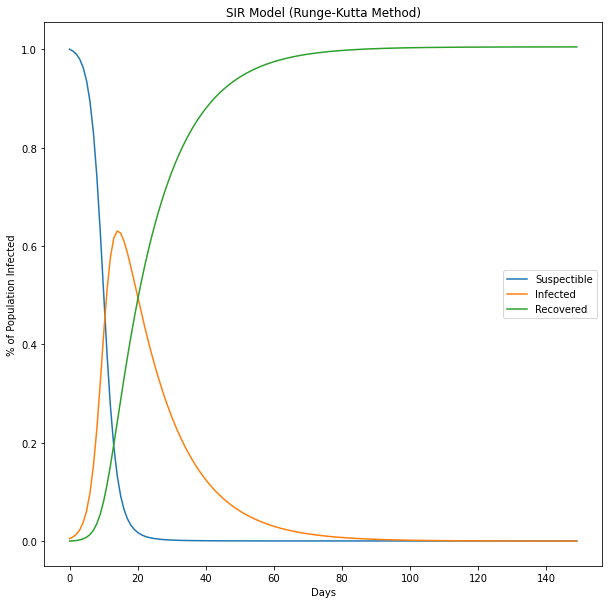

In [2]:
def runge_kutta(init_infect,b,k,days):
    S = np.zeros([days,1])
    S[0] = 1
    I = np.zeros([days,1])
    I[0] = init_infect
    R = np.zeros([days,1])
    days_arr = np.arange(0,days,1)
    
    dt = 1
    N = int(days/dt)
    for i in range(N-1):
        S_mid = S[i] + (dt*(-b*S[i]*I[i]))/2
        I_mid = I[i] + (dt*(b*S[i]*I[i]-((1/k)*I[i])))/2
        R_mid = R[i] + (dt*((1/k)*I[i]))/2
        
        S[i+1] = S[i] + dt*(-b*S_mid*I_mid)
        I[i+1] = I[i] + dt*(b*S_mid-(1/k))*I_mid
        R[i+1] = R[i] + dt*(I_mid/k)
        
    figure=pyplot.figure(figsize=(10,10))
    pyplot.plot(days_arr,S,label="Suspectible")
    pyplot.plot(days_arr,I,label="Infected")
    pyplot.plot(days_arr,R,label="Recovered")
    pyplot.legend()
    pyplot.xlabel('Days')
    pyplot.ylabel('% of Population Infected')
    pyplot.title('SIR Model (Runge-Kutta Method)')

interact(runge_kutta,
        init_infect=widgets.FloatSlider(min=0,max=.1,step=.001,value=.005,description='Init. Infected Pop.',style=style,layout=slider_layout),
        b=widgets.FloatSlider(min=0,max=1,step=.01,value=6/10,description='Contacts/Day',style=style, layout=slider_layout),
        k=widgets.IntSlider(min=1,max=28,step=1,value=14,description='Days of Infection',style=style, layout=slider_layout),
        days=widgets.IntSlider(min=1,max=365,step=1,value=150,description='Days',style=style, layout=slider_layout))

